In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

In [3]:
import bayesianchangepoint as bcp


## performing inference: application to experimental data

* this code was used in the following publication: ["Humans adapt their anticipatory eye movements to the volatility of visual motion properties" (2020) by Pasturel, Montagnini and Prrinet](https://laurentperrinet.github.io/publication/pasturel-montagnini-perrinet-20/)

Let's first define the switching process:

We first draw random events (that we denote as "switches") with a given mean frequency (the "hazard rate") and which controls the strength of the volatility. Second, the value $p$ of the bias only changes at the moment of a switch, independently of the previous bias' value and it is stationary between two switches, forming what we call an "epoch". Third, target direction is drawn as a Bernoulli trial using the current value of $p$. 

![Figure 2 - A](../bsm.png)

In [4]:
seed = 42
np.random.seed(seed)

N_blocks = 3
seed = 51 #119 #2017
N_trials = 200
tau = N_trials/5.

In [5]:
(trials, p) = bcp.switching_binomial_motion(N_trials=N_trials, 
                                            N_blocks=N_blocks, 
                                            tau=tau, 
                                            seed=seed)

In [6]:
print('p.shape=', p.shape)

p.shape= (200, 3, 3)


In [7]:
i_block = 0
print('occurrences=', p[:, i_block, 0])
print('p=', p[:, i_block, 1])
print('switches=', p[:, i_block, -1])

occurrences= [0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1.]
p= [0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.647

In [8]:
p0, r0 = .5, 1.
print('p0, r0 = ', p0, r0)
#N_trials = a.exp['N_trials']
h = 1./tau # a.exp['tau']
print('this experiment uses', N_trials, 'trials and a switch rate of h=', h, '(that is, one switch every', 1/h, 'trials on average)')

p0, r0 =  0.5 1.0
this experiment uses 200 trials and a switch rate of h= 0.025 (that is, one switch every 40.0 trials on average)



## performing inference

* get the full dataset @ https://github.com/chloepasturel/AnticipatorySPEM


i_block= 0


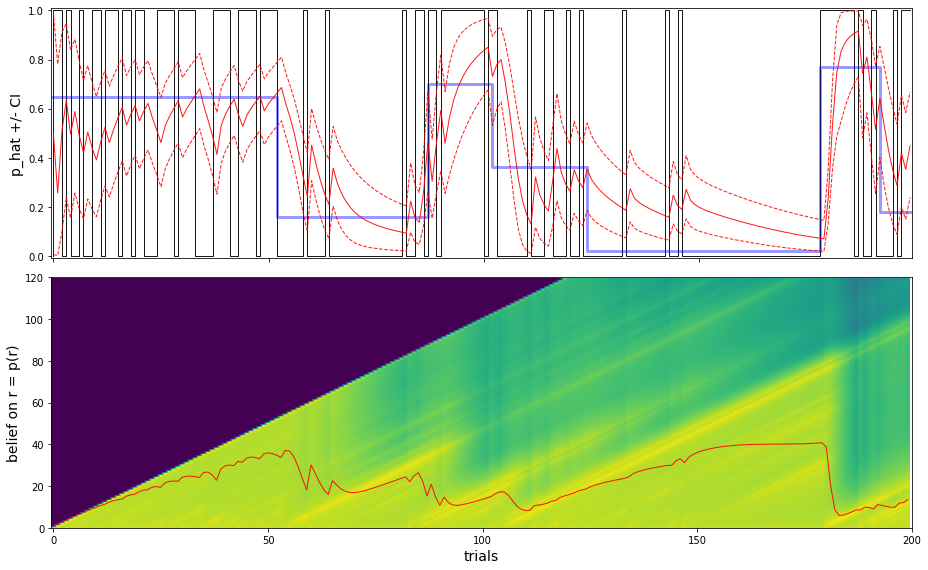

i_block= 1


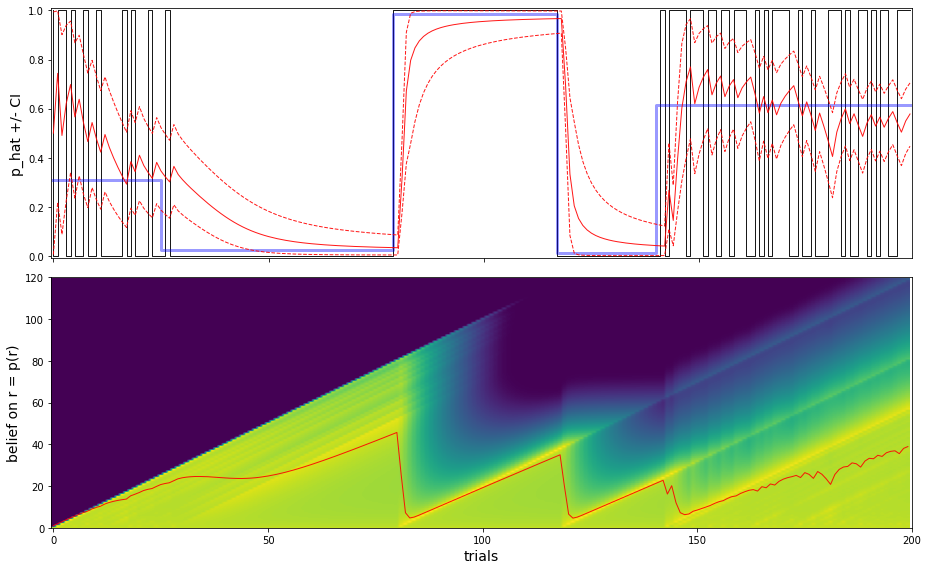

i_block= 2


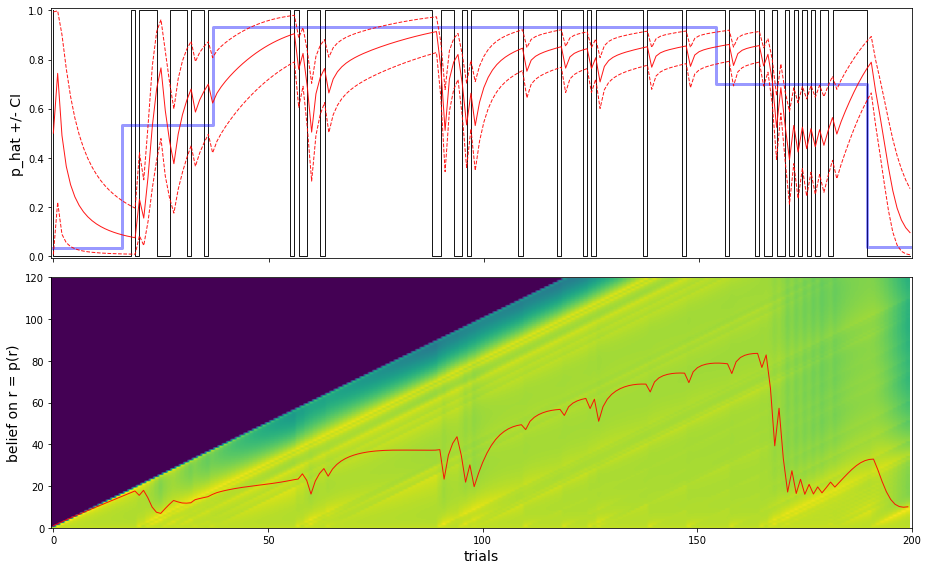

In [9]:
for i_block in range(N_blocks):
    print('i_block=', i_block)
    o = p[:, i_block, 0]
    p_bar, r, beliefs = bcp.inference(o, h=h, p0=p0)
    fig, axs = bcp.plot_inference(p[:, i_block, 0], p[:, i_block, 1], p_bar, r, beliefs, eps=1e-18, p0=p0)
    plt.show()